## Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
import seaborn as sns

## Given Dataset

In [67]:
data = pd.read_csv(r'/content/drive/MyDrive/dataset.csv')

In [68]:
data

VIN (1-10)     County           City State  Postal Code  Model Year  \
0       JTMEB3FV6N     Monroe       Key West    FL        33040        2022   
1       1G1RD6E45D      Clark       Laughlin    NV        89029        2013   
2       JN1AZ0CP8B     Yakima         Yakima    WA        98901        2011   
3       1G1FW6S08H     Skagit       Concrete    WA        98237        2017   
4       3FA6P0SU1K  Snohomish        Everett    WA        98201        2019   
...            ...        ...            ...   ...          ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA        98019        2022   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA        98250        2019   
112631  1FMCU0KZ4N       King         Vashon    WA        98070        2022   
112632  KNDCD3LD4J       King      Covington    WA        98042        2018   
112633  YV4BR0CL8N       King      Covington    WA        98042        2022   

             Make       Model                   Electric Vehicle Type  \
0          TOYOTA  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1       CHEVROLET        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2          NISSAN        LEAF          Battery Electric Vehicle (BEV)   
3       CHEVROLET     BOLT EV          Battery Electric Vehicle (BEV)   
4            FORD      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
...           ...         ...                                     ...   
112629      TESLA     MODEL Y          Battery Electric Vehicle (BEV)   
112630     NISSAN        LEAF          Battery Electric Vehicle (BEV)   
112631       FORD      ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
112632        KIA        NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
112633      VOLVO        XC90  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              42   
1                 Clean Alternative Fuel Vehicle Eligible              38   
2                 Clean Alternative Fuel Vehicle Eligible              73   
3                 Clean Alternative Fuel Vehicle Eligible             238   
4                   Not eligible due to low battery range              26   
...                                                   ...             ...   
112629  Eligibility unknown as battery range has not b...               0   
112630            Clean Alternative Fuel Vehicle Eligible             150   
112631            Clean Alternative Fuel Vehicle Eligible              38   
112632              Not eligible due to low battery range              26   
112633              Not eligible due to low battery range              18   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                   NaN       198968248   
1               0                   NaN         5204412   
2               0                  15.0       218972519   
3               0                  39.0       186750406   
4               0                  38.0         2006714   
...           ...                   ...             ...   
112629          0                  45.0       217955265   
112630          0                  40.0       103663227   
112631          0                  34.0       193878387   
112632          0                  47.0       125039043   
112633          0                  47.0       194673692   

                   Vehicle Location  \
0         POINT (-81.80023 24.5545)   
1       POINT (-114.57245 35.16815)   
2       POINT (-120.50721 46.60448)   
3        POINT (-121.7515 48.53892)   
4       POINT (-122.20596 47.97659)   
...                             ...   
112629  POINT (-121.98609 47.74068)   
112630  POINT (-123.01648 48.53448)   
112631   POINT (-122.4573 47.44929)   
112632  POINT (-122.09124 47.33778)   
112633  POINT (-122.09124 47.33778)   

                                         Electric Utility  2020 Census Tract  


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

## Checking for Null Values

In [70]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

## FILLING NaN VALUES

In [71]:
data['Legislative District'].fillna(data['Legislative District'].mean(), inplace=True)

In [72]:
data['Model'].fillna(data['Model'].mode().iloc[0], inplace=True)

In [73]:
data['Vehicle Location'].fillna(data['Vehicle Location'].mode().iloc[0], inplace=True)

In [74]:
data['Electric Utility'].fillna(data['Electric Utility'].mode().iloc[0], inplace=True)

In [75]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

## Data Visualization

## Uni-Variate Analysis

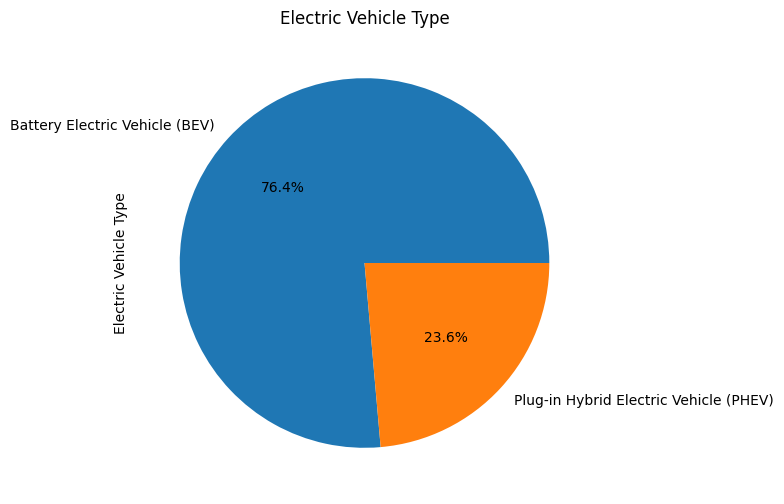

In [76]:
plt.figure(figsize=(8, 6))
data['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title(f"Electric Vehicle Type")
plt.show()

## Bi-Variate Analysis

In [77]:
fig = px.scatter(data, x='Model', y='Electric Range', title='Model vs Electric Range', color_discrete_sequence=['blue'])
fig.show()

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Base MSRP', data=data)
plt.title("Bar Plot - Make vs. Base MSRP")
plt.xlabel("Make")
plt.ylabel("Base MSRP")
plt.xticks(rotation=45)
plt.show()

## Heatmap (Correlation between numerical variables)

<ipython-input-79-ec23bd9df51b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



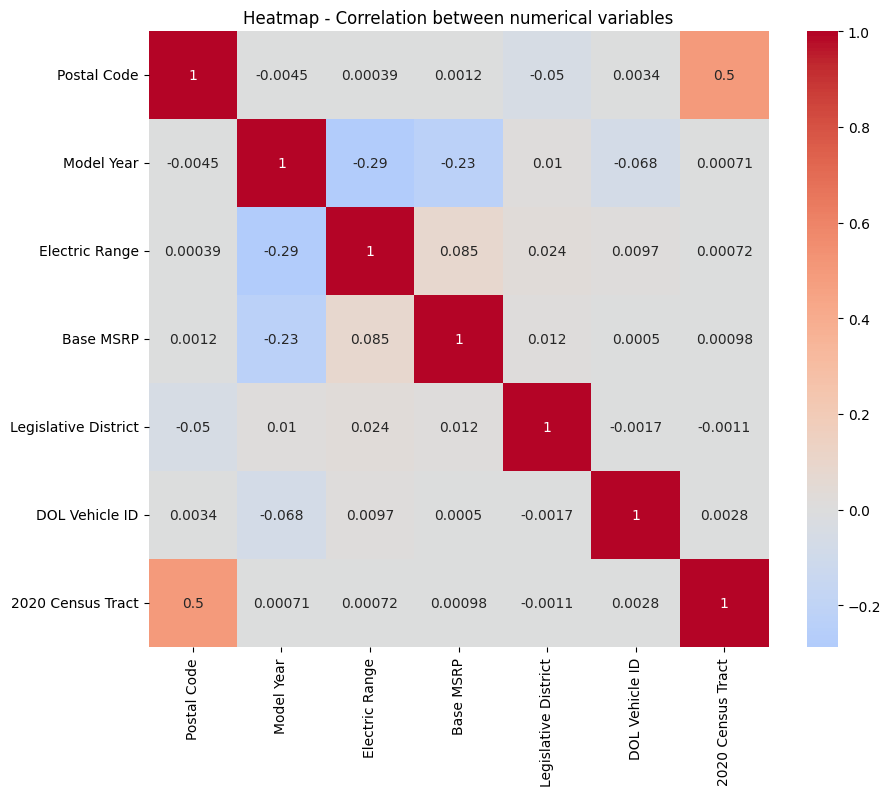

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap - Correlation between numerical variables")
plt.show()

## Creating Racing Bar Chart

In [80]:
!pip install bar_chart_race

In [81]:
import bar_chart_race as bcr

In [82]:
data['Model Year'] = pd.to_datetime(data['Model Year'], format='%Y')

In [83]:
data_grouped =data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

In [84]:
data_pivot = data_grouped.pivot(index='Model Year', columns='Make', values='Count')

In [85]:
data_pivot = data_pivot.fillna(method='pad')

In [86]:
bcr.bar_chart_race(
    df=data_pivot,
    filename='ev_make_racing_bar_plot.mp4',  # Output file name for the animation
    orientation='h',  # Horizontal bars
    sort='desc',      # Sort the bars in descending order
    n_bars=10,        # Number of bars to show
    fixed_order=False, # Allow bars to change positions
    title='EV Make Racing Bar Plot',  # Animation title
    label_bars=True,  # Show the value label on each bar
    period_label={'x': 0.99, 'y': 0.25, 'ha': 'right', 'va': 'center'},  # Position of the year label
    period_fmt='%Y',  # Format of the year label
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`



## Creating Choropleth Map

In [87]:
import plotly.express as px

In [88]:
fig=px.choropleth(data,locations='State',color='State',hover_name='Model Year'
                   ,locationmode='USA-states',animation_frame='Legislative District',scope = 'usa')
fig.show()